In [5]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from IPython.display import HTML
import numpy as np

from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
IMAGE_SIZE = 256
BATCH_SIZE = 32 #standard batch size
CHANNELS = 3 #RGB channels
EPOCHS = 20
#initialization of constants
#Constants that we refer to later

In [7]:
#Image Data Generator API in order to do data augmentation for training dataset
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
)

train_generator = train_datagen.flow_from_directory(
    'dataset/train',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse', #0,1,2 
)

Found 12804 images belonging to 10 classes.


In [8]:
#Image Data Generator API in order to do data augmentation for validation dataset
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
)

validation_generator = validation_datagen.flow_from_directory(
    'dataset/val',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse', #0,1,2 
)

Found 1597 images belonging to 10 classes.


In [9]:
#Image Data Generator API in order to do data augmentation for validation dataset
test_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    rotation_range=10,
)

test_generator = test_datagen.flow_from_directory(
    'dataset/test',
    target_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size=BATCH_SIZE,
    class_mode='sparse', #0,1,2 
)

#Created 3 generators: train, validation and test

Found 1610 images belonging to 10 classes.


In [10]:
# The name of the 12 diseases.
train_generator.class_indices

#folder names are class names
#displaying the class names of our dataset

{'Tomato_Bacterial_spot': 0,
 'Tomato_Early_blight': 1,
 'Tomato_Late_blight': 2,
 'Tomato_Leaf_Mold': 3,
 'Tomato_Septoria_leaf_spot': 4,
 'Tomato_Spider_mites_Two_spotted_spider_mite': 5,
 'Tomato__Target_Spot': 6,
 'Tomato__Tomato_YellowLeaf__Curl_Virus': 7,
 'Tomato__Tomato_mosaic_virus': 8,
 'Tomato_healthy': 9}

In [11]:
class_names = list(train_generator.class_indices.keys())
class_names

['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

In [12]:
 print(f"Length of each dataset:")
 print(f"\tTraining dataset:{len(train_generator)}\n"
    f"\tValidation dataset:{len(validation_generator)}\n"
    f"\tTest dataset:{len(test_generator)}")
 
train_samples= train_generator.samples
val_samples = validation_generator.samples
test_samples = test_generator.samples
 
 print(f"\nTotal no. of samples found across 10 classes:")
 print(f"\tTraining images: {train_samples}")
 print(f"\tVal images: {val_samples}")
 print(f"\tTest images: {test_samples}")


Length of each dataset:
	Training dataset:401
	Validation dataset:50
	Test dataset:51

Total no. of samples found across 10 classes:
	Training images: 12804
	Val images: 1597
	Test images: 1610


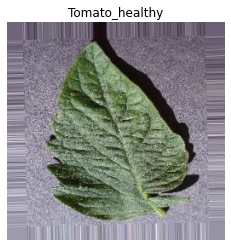

In [9]:
for image_batch, label_batch in test_generator:
    
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    plt.imshow(first_image)
    plt.title(class_names[first_label])
    plt.axis('off')
    
    break

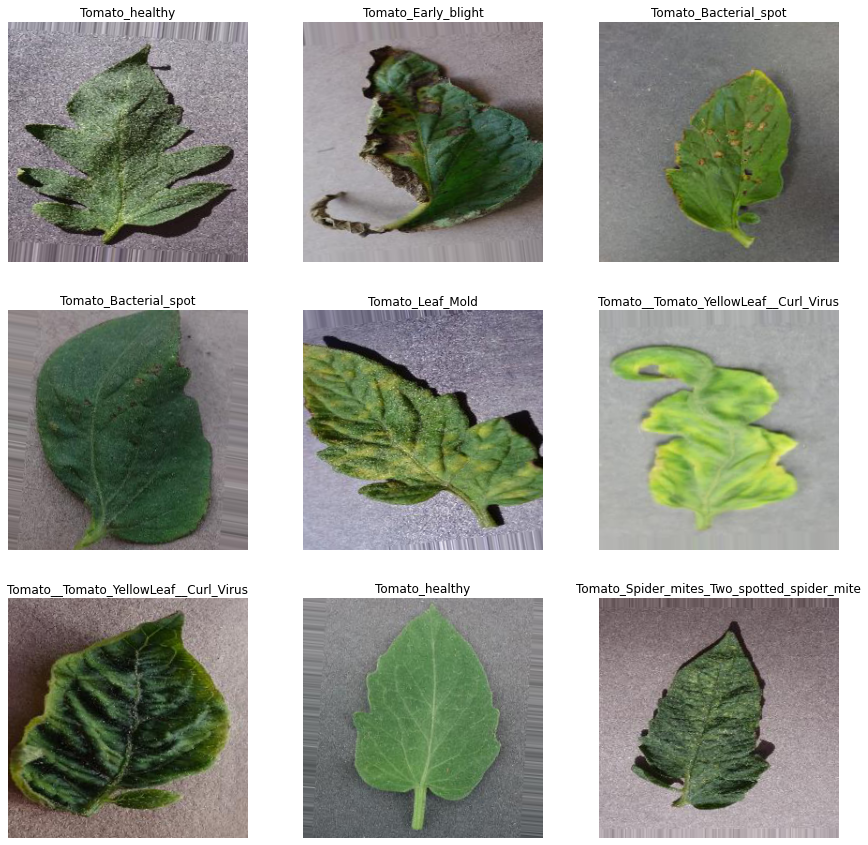

In [10]:
#data visualization 
plt.figure(figsize=(15, 15))

for images, labels in train_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        img = images[i]
        lab = class_names[int(labels[i])]
        
        plt.imshow(img)
        plt.title(lab)        
        plt.axis("off")
        
    break
    

In [11]:
#Build a CNN model
#Kernel size is the size of the filter 
#each filter detects different features
#softmax normalizes the probablity of the classes

input_shape = (IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
num_classes = 10

model = models.Sequential([
    layers.InputLayer(input_shape=input_shape),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(32, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.25),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax'),
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 32)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 64)       0

In [12]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

#If your output layer has a 'softmax' activation, from_logits should be False . 
#If your output layer doesn't have a 'softmax' activation, from_logits should be True

In [13]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_samples//BATCH_SIZE,
    batch_size=BATCH_SIZE,
    validation_data=validation_generator,
    validation_steps=val_samples//BATCH_SIZE,
    verbose=1,
    epochs=EPOCHS,
)

Epoch 1/20
400/400 [==============================] - 1027s 3s/step - loss: 1.6488 - accuracy: 0.4071 - val_loss: 1.0611 - val_accuracy: 0.6314
Epoch 2/20
400/400 [==============================] - 1080s 3s/step - loss: 0.9943 - accuracy: 0.6574 - val_loss: 0.6945 - val_accuracy: 0.7730
Epoch 3/20
400/400 [==============================] - 977s 2s/step - loss: 0.7305 - accuracy: 0.7461 - val_loss: 0.5223 - val_accuracy: 0.8246
Epoch 4/20
400/400 [==============================] - 947s 2s/step - loss: 0.5519 - accuracy: 0.8086 - val_loss: 0.4240 - val_accuracy: 0.8431
Epoch 5/20
400/400 [==============================] - 1004s 3s/step - loss: 0.4614 - accuracy: 0.8357 - val_loss: 0.3725 - val_accuracy: 0.8807
Epoch 6/20
400/400 [==============================] - 902s 2s/step - loss: 0.3902 - accuracy: 0.8642 - val_loss: 0.2745 - val_accuracy: 0.9075
Epoch 7/20
400/400 [==============================] - 964s 2s/step - loss: 0.3479 - accuracy: 0.8801 - val_loss: 0.2756 - val_accuracy: 0.9

In [102]:
scores = model.evaluate(test_generator)
model.evaluate(train_generator)

401/401 [==============================] - 192s 478ms/step - loss: 0.1125 - accuracy: 0.9603


[0.11250859498977661, 0.9603248834609985]

In [101]:
print(f"Loss score: {scores[0]}\nAccurracy score: {scores[1]}")

Loss score: 0.22763614356517792
Accurracy score: 0.9428571462631226


In [16]:
history.params

{'verbose': 1, 'epochs': 20, 'steps': 400}

In [17]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [18]:
#The 'acc' variable is storing the training set accuracy values
#'val_acc' is storing the validation set accuracy values
#'loss' variable is storing the training set loss values 
#'val_loss' is storing the validation set loss values

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

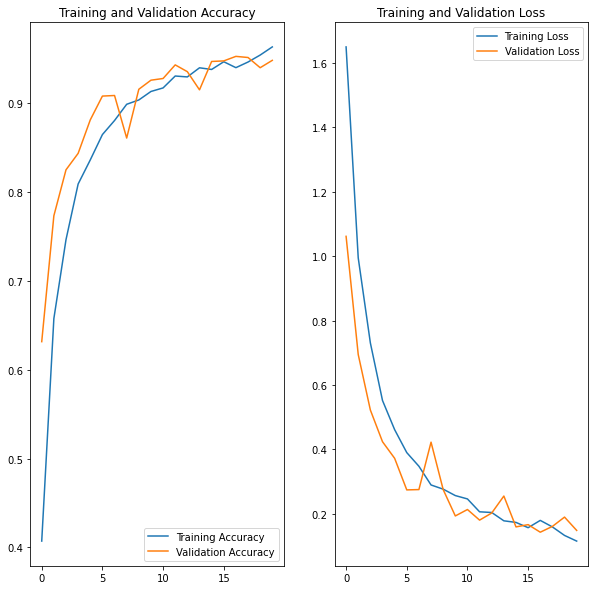

In [19]:
EPOCHS = 20

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

Predicting the first image from the test batch:
Actual label: Tomato_Septoria_leaf_spot
Predicted label: Tomato_Septoria_leaf_spot
[2.6853401e-03 6.1241219e-05 2.3244170e-02 4.8241252e-03 9.6095824e-01
 6.2852963e-03 1.6381203e-03 1.3221885e-04 1.0854504e-04 6.2742503e-05]
4
0.96095824
96.1


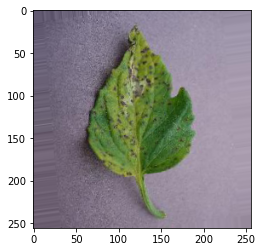

In [45]:
#Run prediction on a sample image
for image_batch, label_batch in test_generator:
    first_image = image_batch[0]
    first_label = int(label_batch[0])
    
    print("Predicting the first image from the test batch:")
    plt.imshow(first_image)
    print(f"Actual label: {class_names[first_label]}")
    
    batch_prediction = model.predict(image_batch)
    print(f"Predicted label: {class_names[np.argmax(batch_prediction[0])]}")
    #print(batch_prediction[0])
    #print(np.argmax(batch_prediction[0]))
    #print(np.max(batch_prediction[0]))
    #percentage = round(100*(np.max(batch_prediction[0])),2)
    #print(percentage)                  
    break

The provided code defines a function called "predict" that takes in two arguments: a trained model and an image. The function first converts the image to an array using the img_to_array() function from the tf.keras.preprocessing.image module. Then it uses the expand_dims() function from TensorFlow to add an additional dimension to the image array. This is done because the model.predict() function expects a batch of images as input, so adding an extra dimension allows the single image to be processed as a batch of size 1.

The function then uses the trained model to make a prediction on the image array, and the predictions are stored in the 'predictions' variable.

The predicted class is determined by taking the argmax of the predictions and using it to index into the class_names list. The confidence of the prediction is determined by taking the max of the predictions, multiplying it by 100 and rounding it to 2 decimal places.

Finally, the function returns the predicted class and the confidence of the prediction.

In [21]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0) #add an extra dimension 

    predictions = model.predict(img_array) #trained model makes a predicton on the single image 

    predicted_class = class_names[np.argmax(predictions[0])] 
    confidence = round(100 * (np.max(predictions[0])), 2)
    
    return predicted_class, confidence

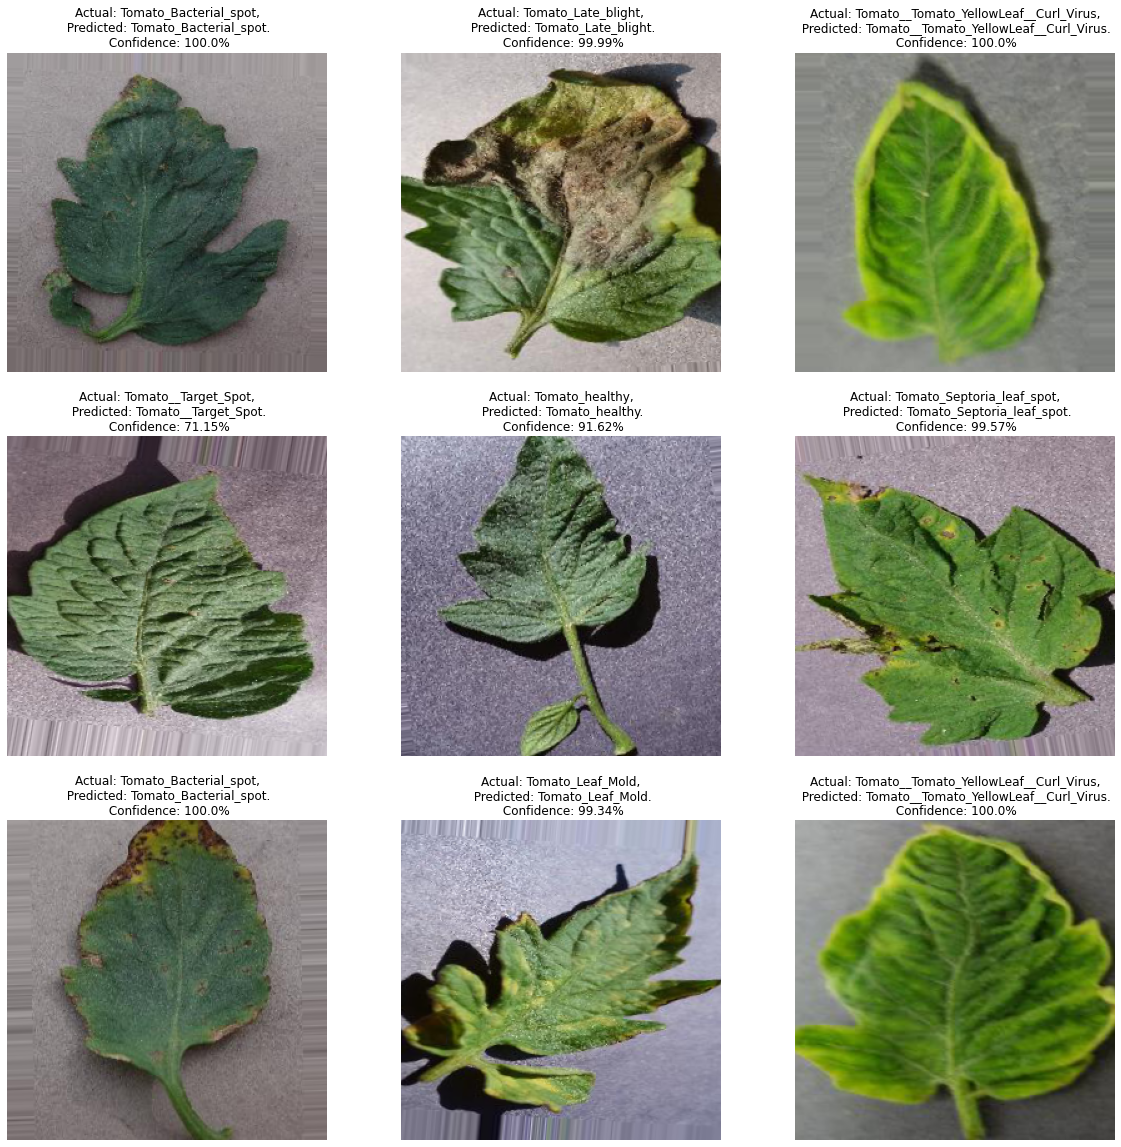

In [22]:
#Now run inference on few sample images
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = class_names[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [ ]:
#save model
#load model and predict new images 
#app flutter deployment

In [96]:
#Save the model as .h5 
model.save("../tomatoes.h5")

In [60]:
model.save_weights('../tomatoes_weights.h5')

In [1]:
from keras.models import load_model
model=load_model('../tomatoes.h5')

Classes= ['Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

Predicted: Tomato__Tomato_YellowLeaf__Curl_Virus
Confidence: 98.7%


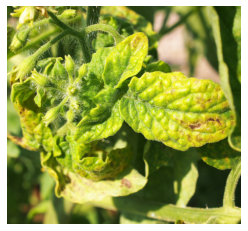

In [2]:
# Pre-Processing test data same as train data.

from keras.preprocessing import image
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

def predict_image(img_path):
    img = image.load_img(img_path, target_size=(256, 256))
    x = image.img_to_array(img)
    x = x/255
    return model.predict(tf.expand_dims(x, axis=0))
        
result = predict_image("Tomato-Leaf-Curl.jpg")
disease=image.load_img('Tomato-Leaf-Curl.jpg')
plt.imshow(disease)
print (f"Predicted: {Classes[np.argmax(result)]}")
plt.axis("off")
confidence = round(100 * (np.max(result)), 2)
print(f"Confidence: {confidence}%")

In [19]:
def predict(model, img):
    img_array = image.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0) #add an extra dimension 

    predictions = model.predict(img_array) #trained model makes a predicton on the single image 

    predicted_class = Classes[np.argmax(predictions)] 
    confidence = round(100 * (np.max(predictions)), 2)
    
    return predicted_class, confidence

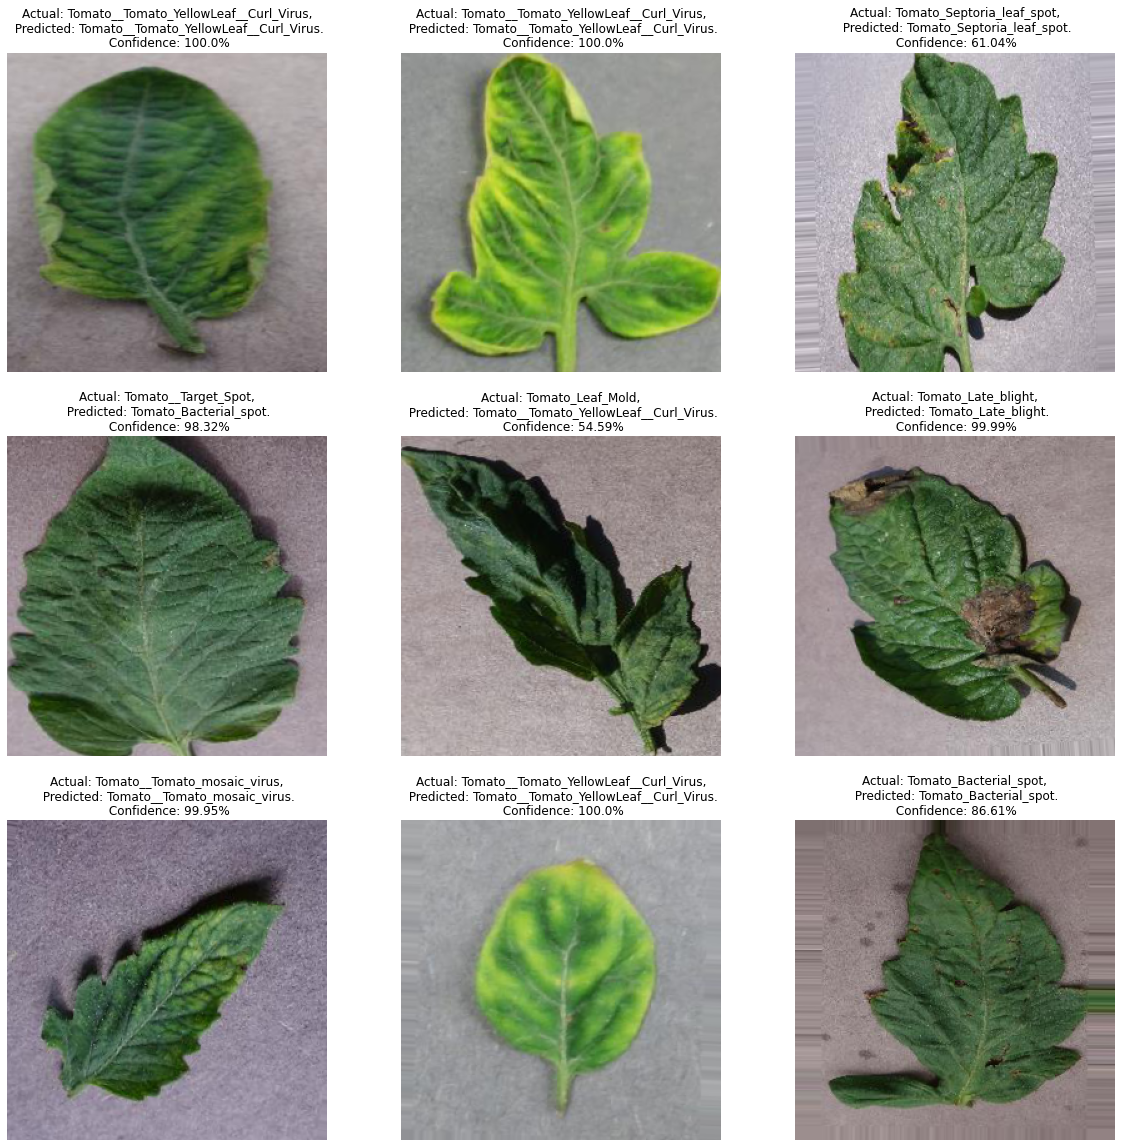

In [20]:
#Now run inference on few sample images
plt.figure(figsize=(20, 20))
for images, labels in test_generator:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
        actual_class = Classes[int(labels[i])] 
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break

In [90]:
#convert model to tflite for mobile applications
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with open("tomatoes.tflite", 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: C:\Users\aaaaa\AppData\Local\Temp\tmpm6s58ecw\assets


INFO:tensorflow:Assets written to: C:\Users\aaaaa\AppData\Local\Temp\tmpm6s58ecw\assets
